# Import

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# load Data

In [2]:
train_df = pd.read_csv('./train.csv').drop('ID',axis=1)
valid_df = pd.read_csv('./val.csv').drop('ID', axis=1)

# EDA

## 결측값 확인

In [3]:
for i, c in enumerate(train_df.isna().sum()):
    if c != 0:
        print(f'V{i+1} 컬럼 결측값의 개수: {c}')

for i, c in enumerate(valid_df.isna().sum()):
    if c != 0:
        print(f'V{i+1} 컬럼 결측값의 개수: {c}')
    

## Validation Dataset Correlation Analysis

0    28432
1       30
Name: Class, dtype: int64


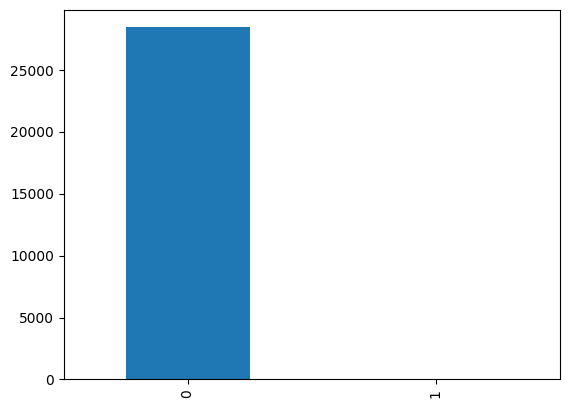

In [4]:
valid_df['Class'].value_counts().plot(kind='bar')
print(valid_df['Class'].value_counts())

In [5]:
# class가 0과 1의 비율이 1:1이 되도록 샘플링
non_fraud_df = valid_df[valid_df['Class']==0].sample(n=30, random_state=1)
fraud_df = valid_df[valid_df['Class']==1]

new_valid_df = pd.concat([fraud_df, non_fraud_df])
new_valid_df = new_valid_df.sample(frac=1, random_state=1).reset_index(drop=True) # 데이터프레임 행 섞기
new_valid_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,-1.098101,1.206453,0.880566,-0.207190,0.043929,-0.438483,0.553795,0.051156,-0.534246,0.126919,...,0.278920,-0.185754,0.023667,0.037695,0.284680,-0.829683,-0.222983,-0.098791,-0.327647,0
1,-0.850957,-0.038907,1.234845,0.252437,-0.491635,1.300389,0.483954,0.155474,0.774682,-0.507209,...,0.882767,0.040040,0.019893,-0.171309,-0.608980,0.074134,0.008844,2.694054,0.446892,0
2,0.857321,4.093912,-7.423894,7.380245,0.973366,-2.730762,-1.496497,0.543015,-2.351190,-3.944238,...,0.145400,0.240603,-0.234649,-1.004881,0.435832,0.618324,0.148469,-0.293440,-0.899012,1
3,1.999899,-0.775735,-0.284871,0.531192,-0.795411,0.430213,-1.085847,0.209261,-0.249696,1.123391,...,0.438767,0.192761,0.664044,-0.127487,-0.535145,0.080420,-0.029477,-0.090827,0.827289,0
4,-1.948561,0.883574,-0.832719,-1.254614,-2.953686,0.892269,3.175510,0.228270,-0.707266,-1.428927,...,-0.533468,0.476328,-0.382893,0.051280,0.724433,0.383769,-0.063761,9.459932,-0.537976,0


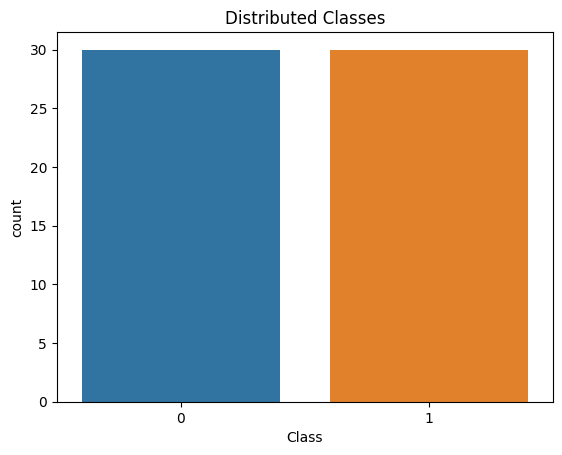

In [7]:
sns.countplot(x='Class', data=new_valid_df)
plt.title("Distributed Classes")
plt.show()


## Correlation Matrix

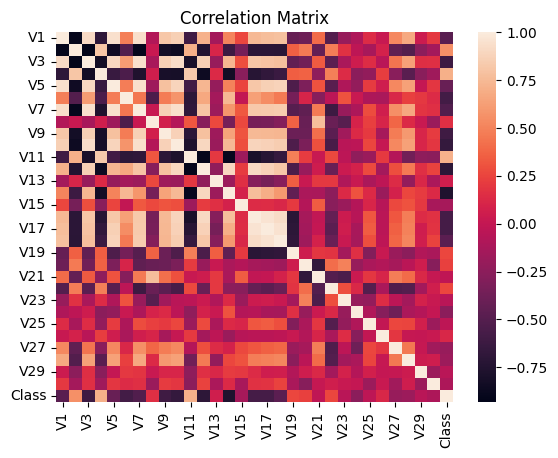

In [8]:
cm = new_valid_df.corr()
sns.heatmap(cm)
plt.title('Correlation Matrix')
plt.show()

In [9]:
for i, (k,v) in enumerate(cm['Class'][:-1].sort_values().items()):
    print(i, k, v)

0 V14 -0.7707858994792842
1 V12 -0.7019921916206477
2 V10 -0.6610144234987699
3 V3 -0.6149179919346767
4 V9 -0.6121667731052577
5 V6 -0.5849010193230738
6 V16 -0.5817192648325998
7 V17 -0.5794971699808791
8 V7 -0.5164382889143714
9 V1 -0.48442146458238156
10 V18 -0.47722760412664195
11 V5 -0.41666938771770323
12 V24 -0.25728153114451807
13 V27 -0.20109232016693812
14 V28 -0.1829995975653561
15 V15 -0.1382695672154113
16 V30 -0.108154314658006
17 V29 -0.05073265127423509
18 V23 -0.04973420300505126
19 V25 -0.02744470373254583
20 V21 -0.020654534611703926
21 V13 0.06344418270995372
22 V26 0.1166121825421633
23 V8 0.16093584743547618
24 V20 0.23333428167946083
25 V19 0.2543995768301764
26 V22 0.25551648692877477
27 V2 0.5595777644755073
28 V4 0.6984489515749778
29 V11 0.7059869166752719


In [10]:
sort_key = list(cm['Class'][:-1].sort_values().keys())

In [11]:
n = sort_key[:9]
p = sort_key[-3:]
new_v_columns = n+p
print(new_v_columns)
print("사용할 컬럼 개수: ", len(new_v_columns))

['V14', 'V12', 'V10', 'V3', 'V9', 'V6', 'V16', 'V17', 'V7', 'V2', 'V4', 'V11']
사용할 컬럼 개수:  12
